In [223]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [224]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

### 28x28 Resolution = 784 Pixel

In [225]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [227]:
m, n

(42000, 785)

In [228]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [229]:
X_train[:, 0].shape

(784,)

In [230]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
    
    return dW1, db1, dW2, db2
    
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2



In [231]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [232]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 9 8 ... 8 9 2] [7 7 4 ... 4 8 3]
0.086
Iteration:  10
[2 6 8 ... 0 4 5] [7 7 4 ... 4 8 3]
0.15573170731707317
Iteration:  20
[3 2 5 ... 0 4 5] [7 7 4 ... 4 8 3]
0.25602439024390244
Iteration:  30
[7 2 5 ... 9 4 3] [7 7 4 ... 4 8 3]
0.36321951219512194
Iteration:  40
[7 2 5 ... 9 4 3] [7 7 4 ... 4 8 3]
0.4371951219512195
Iteration:  50
[7 7 5 ... 9 8 3] [7 7 4 ... 4 8 3]
0.4987560975609756
Iteration:  60
[7 7 5 ... 9 8 3] [7 7 4 ... 4 8 3]
0.5453414634146342
Iteration:  70
[7 7 5 ... 9 3 3] [7 7 4 ... 4 8 3]
0.5837073170731707
Iteration:  80
[7 7 5 ... 9 8 3] [7 7 4 ... 4 8 3]
0.6142439024390244
Iteration:  90
[7 7 5 ... 9 8 3] [7 7 4 ... 4 8 3]
0.6399756097560976
Iteration:  100
[7 7 5 ... 4 8 3] [7 7 4 ... 4 8 3]
0.6619024390243903
Iteration:  110
[7 7 5 ... 4 8 3] [7 7 4 ... 4 8 3]
0.6815121951219513
Iteration:  120
[7 7 5 ... 4 8 3] [7 7 4 ... 4 8 3]
0.6986097560975609
Iteration:  130
[7 7 5 ... 4 8 3] [7 7 4 ... 4 8 3]
0.7139512195121951
Iteration:  140
[7 7 5 ... 

In [234]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


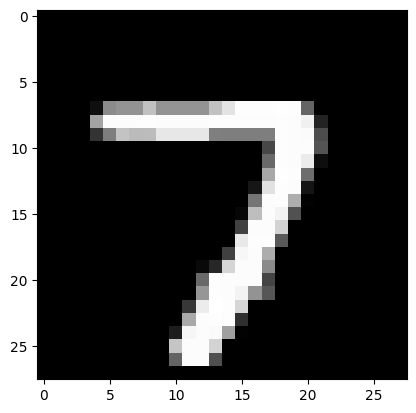

Prediction:  [7]
Label:  7


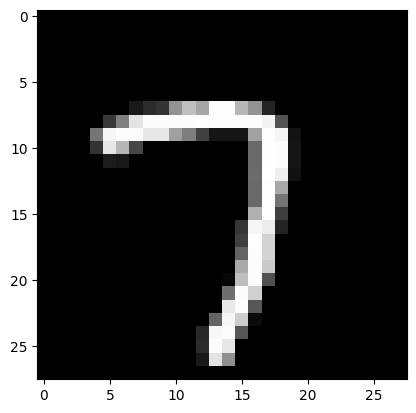

Prediction:  [4]
Label:  4


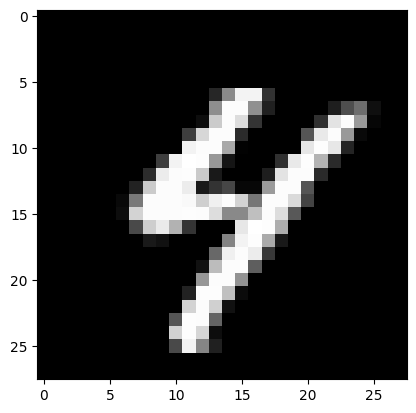

Prediction:  [2]
Label:  2


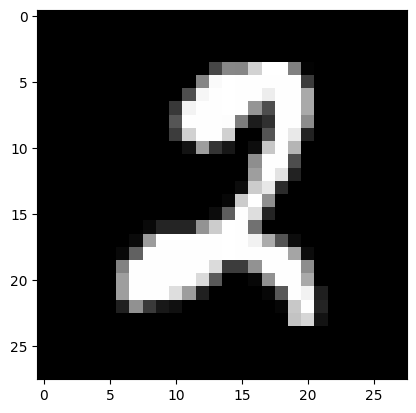

In [239]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [236]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 2 6 1 2 0 1 3 5 9 9 4 0 8 3 1 1 1 3 2 0 2 9 6 7 9 9 1 7 4 0 0 6 6 9 8 1
 6 9 6 4 6 7 0 0 6 3 1 9 3 7 4 2 9 9 4 3 2 7 4 4 9 4 7 6 0 7 7 0 7 2 6 2 4
 9 8 3 4 4 0 1 5 7 5 4 4 7 0 7 4 3 4 7 6 3 3 8 5 8 3 9 9 7 7 7 6 3 6 8 8 3
 2 6 2 4 5 5 3 4 9 4 1 4 4 5 4 3 0 1 1 6 4 3 6 5 2 4 5 2 9 7 6 0 3 1 3 7 7
 4 3 2 8 7 5 6 4 6 7 8 1 5 4 1 1 4 1 9 3 1 2 3 0 0 1 2 4 9 1 3 8 1 9 0 5 4
 0 0 7 8 5 8 8 5 3 0 1 4 7 2 2 3 5 2 1 9 3 2 7 9 1 7 0 4 2 7 3 8 8 8 4 6 9
 9 0 7 7 6 2 5 3 2 7 7 9 8 8 9 3 7 2 3 7 7 3 8 7 2 8 9 8 2 6 8 1 0 8 2 5 3
 1 6 3 8 4 4 8 1 4 3 4 4 0 8 3 2 7 7 8 9 0 2 8 6 9 6 4 2 4 2 8 1 9 7 6 5 6
 6 1 4 1 6 4 0 0 2 1 7 7 3 5 5 1 6 7 9 3 5 1 3 0 4 5 8 6 9 9 5 8 4 5 8 7 9
 1 4 7 0 1 3 7 0 2 2 9 4 7 7 3 3 0 0 2 5 5 1 1 4 9 3 7 7 5 1 2 3 8 9 7 4 2
 5 7 0 7 1 3 0 7 0 5 1 0 8 8 0 1 4 0 5 4 6 2 6 8 1 1 2 0 7 1 5 0 8 6 2 3 4
 2 6 1 0 7 7 0 0 0 6 3 2 5 2 8 5 9 2 8 0 0 9 8 0 4 1 0 3 3 7 0 2 0 8 9 0 7
 8 7 3 6 6 9 7 0 1 1 2 7 4 1 1 4 8 4 7 2 0 6 7 4 2 1 1 6 6 7 8 4 8 6 7 6 9
 5 6 4 3 1 9 1 9 4 9 3 2 

0.84